In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
path_to_data = 'D://COUGHVID/coswara'
assert os.path.exists(path_to_data)
csv_file = os.path.join(path_to_data, 'extracted_data.csv')
df = pd.read_csv(csv_file)

,Unnamed: 0,id,a,covid_status,record_date,ep,g,l_c,l_l,l_s,...,vacc,bd,others_resp,ftg,st,ihd,asthma,others_preexist,cld,pneumonia
0,0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,2020-04-23,y,male,India,Anantapur,Andhra Pradesh,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,2020-04-20,y,male,India,BENGALURU URBAN,Karnataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,2020-04-24,y,female,United States,Pittsburgh,Pennsylvania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,2020-04-23,y,male,India,Bangalore,Karnataka,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,2020-04-22,y,male,India,Nalanda,Bihar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,2227,q9AJkEfjEtQYaUFVbbFl1cN7TKH3,50,positive_mild,2021-07-14,y,male,India,Coimbatore,Tamil Nadu,...,p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1754,2229,dpA0EeRrtJUeKJjEuf7BL0AeTJZ2,36,positive_mild,2021-07-06,y,male,India,MSRMC,Karnataka,...,p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1755,2230,UXhG3vgoxkWtd4Meky1nm0sRgMV2,76,positive_mild,2021-07-13,y,male,India,Coimbatore,Tamil Nadu,...,y,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
1756,2231,A5KW9PXraNgckln1gnNaJnX6DvB2,25,positive_moderate,2021-07-01,y,male,India,Coimbatore,Tamil Nadu,...,p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Now let's visualize and listen to some sounds!!
import librosa
import IPython
audio_path = os.path.join(path_to_data, 'audio')
audio_files = os.listdir(audio_path)
audio_file = os.path.join(audio_path, audio_files[0])
x, sr = librosa.load(audio_file)
print(x.shape) # audio array
print(sr) # sampling rate

(180634,)
22050


In [39]:
import IPython.display as ipd
ipd.Audio(audio_file)

In [25]:
print(x.shape)

(205095,)


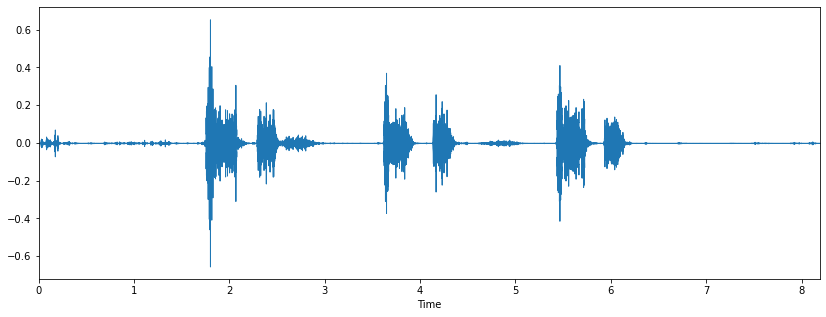

In [51]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [123]:
import math
RMS=math.sqrt(np.mean(x**2))
print(RMS)

0.08115534105515324


In [124]:
def apply(signal, RMS):
    #noise = np.random.randn(*features.shape).astype(np.float32)

    dimension = signal.shape[0]
    noise = np.random.normal(0, RMS, dimension)

    randomness = np.random.randint(2, size=dimension)
    noise = randomness * noise

    samples = signal + noise
    return samples

In [126]:
samples = apply(x, RMS)

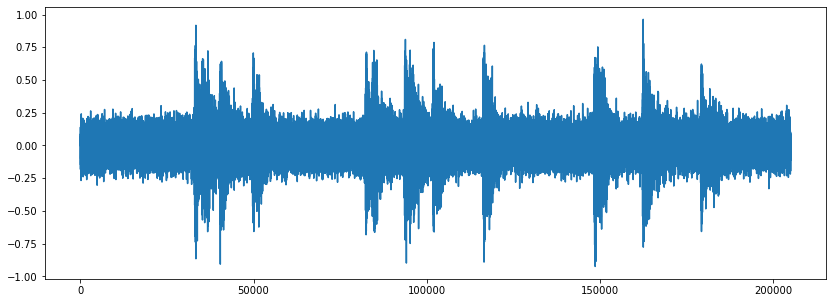

In [127]:
plt.figure(figsize=(14, 5))
plt.plot(samples)

Generate before/after plots for first 10 samples

In [128]:
files = [os.path.join(audio_path, audio_files[i])
         for i in range(0,10)]
samples = [librosa.load(f) for f in files]

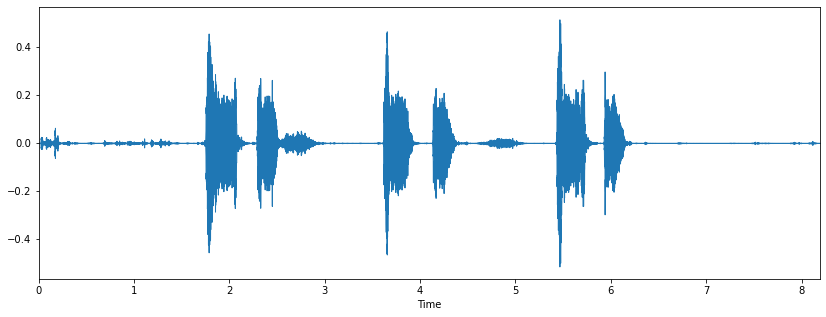

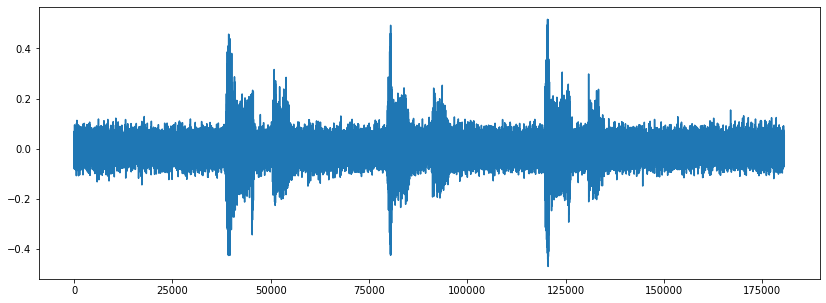

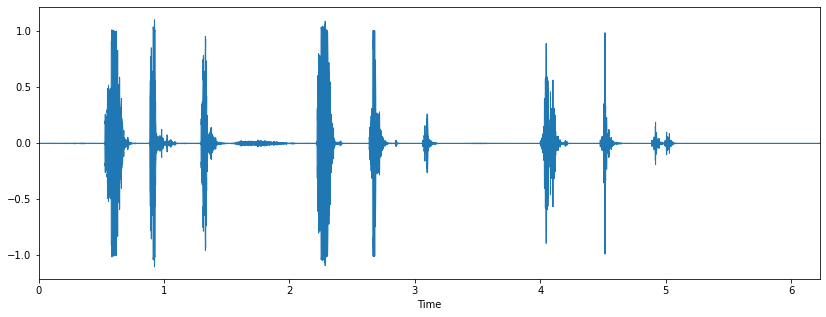

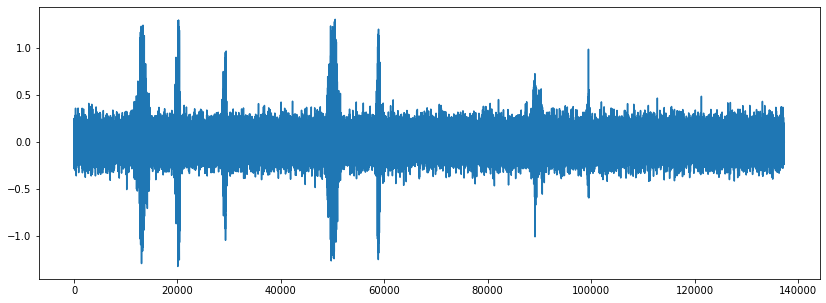

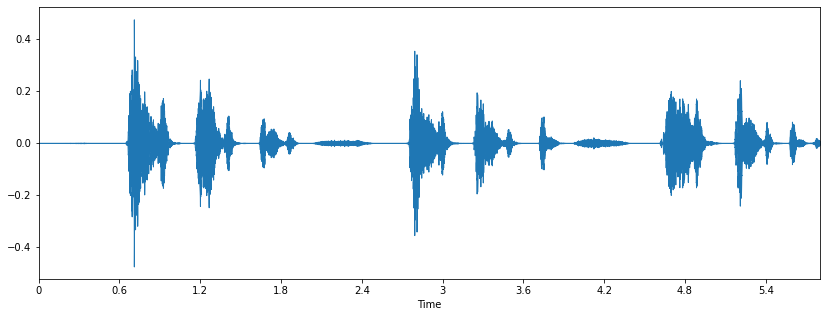

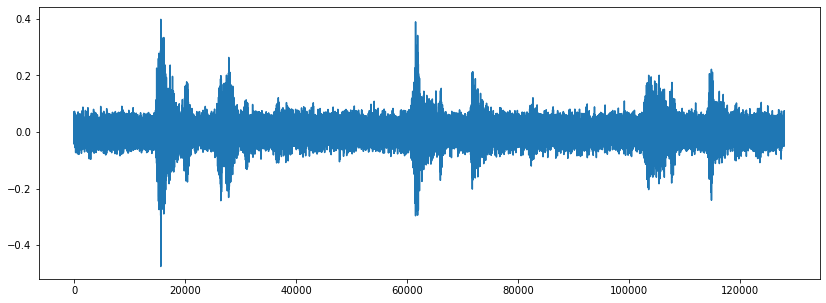

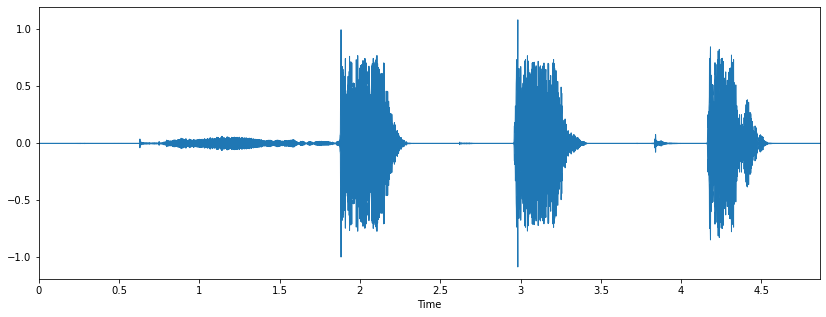

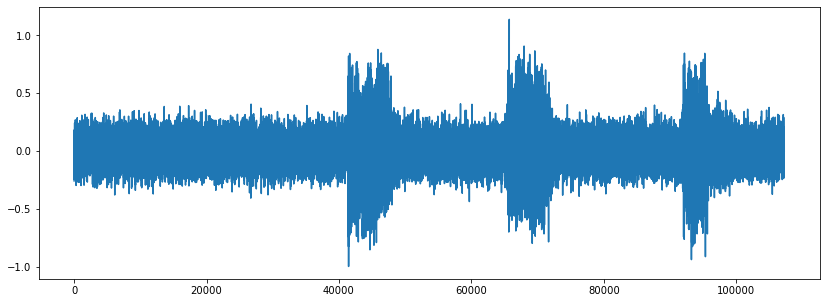

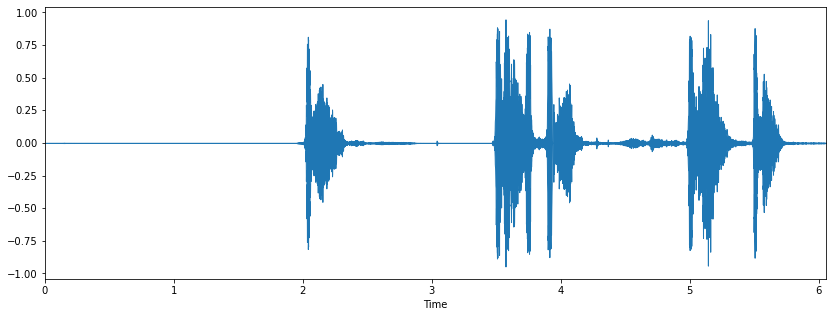

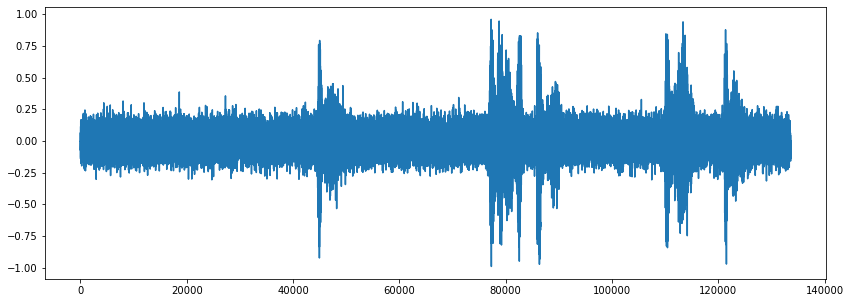

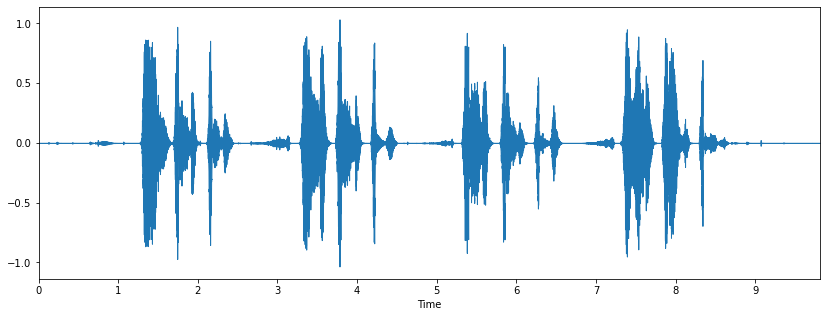

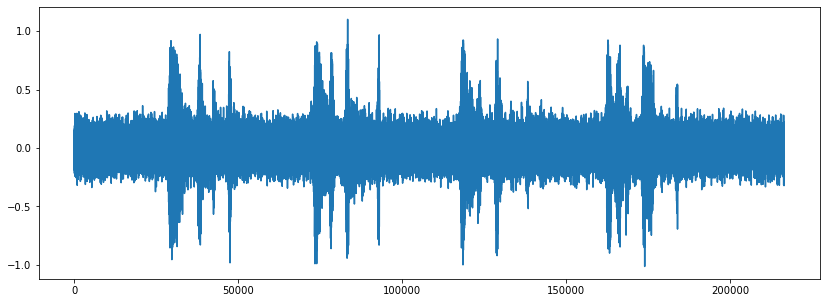

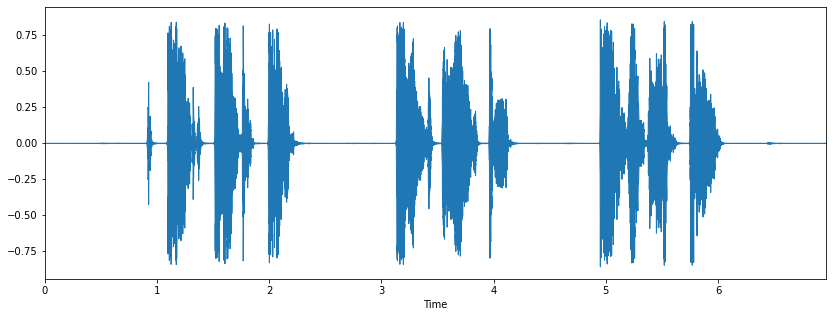

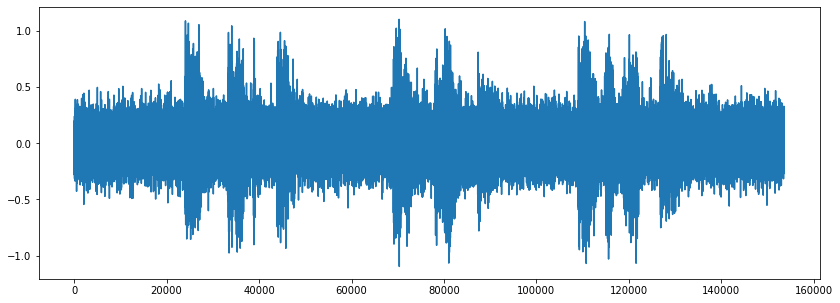

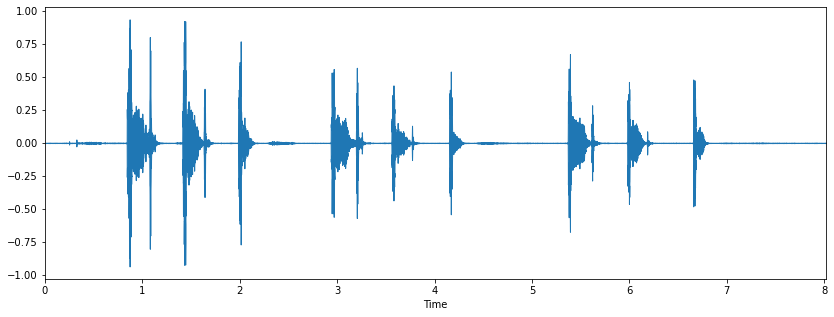

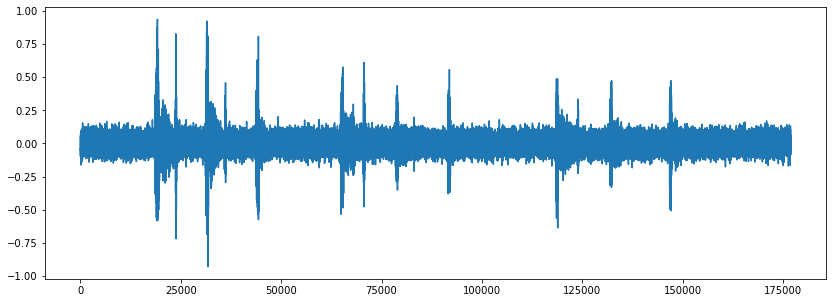

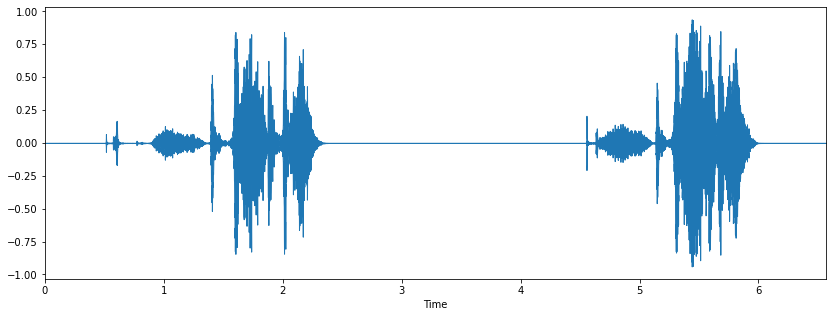

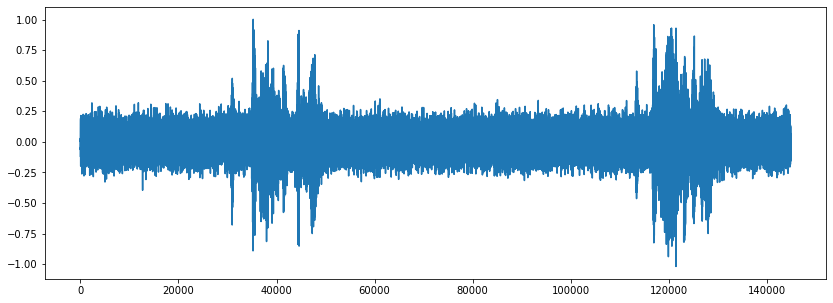

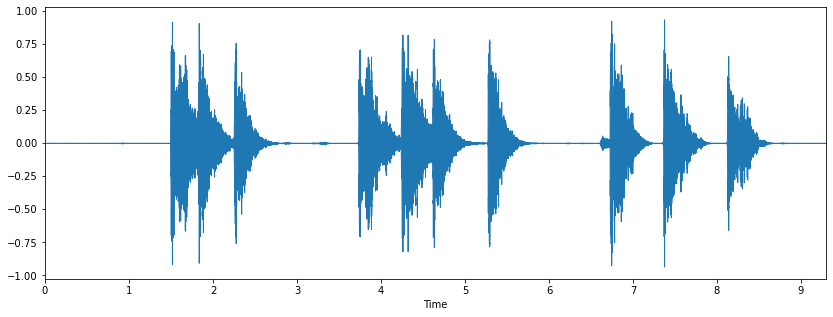

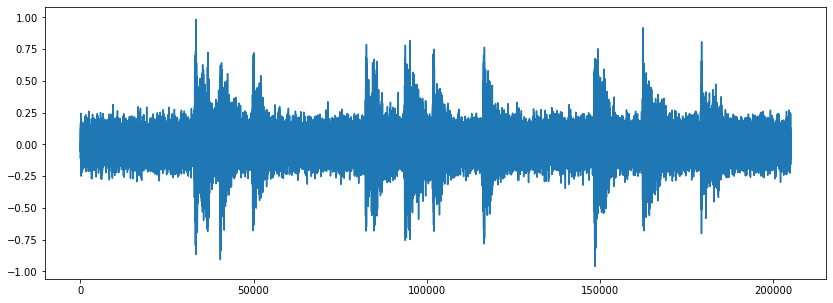

In [129]:
for sample, file in zip(samples, files):
    x, sr = sample
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr) #before noise
    
    RMS=math.sqrt(np.mean(x**2))
    samples_noise = apply(x, RMS)
    plt.figure(figsize=(14, 5))
    plt.plot(samples_noise)